In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [80]:
data = pd.read_csv(r'G:\FSDA\INEURON-INTERNSHIP-PROJECT-01\DATASET\MASTER.CSV',encoding = 'latin-1')

In [81]:
data.head()

,ORDER_DATE,SHIPED_DATE,SalesOrderNumber,CUSTOME_BIRTHDAY,NAME_CUSTMOER,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,MaritalStatus,Gender,Education,Occupation,DATE_FIRST_PURCHASE,ProductName,country
0,2014-01-22,2014-01-29,SO43793,57,Jon Yang,2,1699.995,1912.1544,3399.99,271.9992,M,M,Bachelors,Professional,2014-01-22,"Mountain-100 Silver, 38",Australia
1,2016-01-22,2016-01-29,SO51522,57,Jon Yang,1,2319.990,1265.6195,2319.99,185.5992,M,M,Bachelors,Professional,2014-01-22,"Mountain-200 Silver, 38",Australia
2,2016-01-22,2016-01-29,SO51522,57,Jon Yang,1,21.980,8.2205,21.98,1.7584,M,M,Bachelors,Professional,2014-01-22,Fender Set - Mountain,Australia
3,2016-05-04,2016-05-11,SO57418,57,Jon Yang,1,2384.070,1481.9379,2384.07,190.7256,M,M,Bachelors,Professional,2014-01-22,"Touring-1000 Blue, 46",Australia
4,2016-05-04,2016-05-11,SO57418,57,Jon Yang,1,28.990,10.8423,28.99,2.3192,M,M,Bachelors,Professional,2014-01-22,Touring Tire,Australia


In [10]:
data.isnull().sum()

ORDER_DATE             0
SHIPED_DATE            0
CUSTOME_BIRTHDAY       0
NAME_CUSTMOER          0
OrderQuantity          0
UnitPrice              0
TotalProductCost       0
SalesAmount            0
TaxAmt                 0
MaritalStatus          0
Gender                 0
Education              0
Occupation             0
DATE_FIRST_PURCHASE    0
ProductName            0
country                0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ORDER_DATE           58189 non-null  object 
 1   SHIPED_DATE          58189 non-null  object 
 2   CUSTOME_BIRTHDAY     58189 non-null  int64  
 3   NAME_CUSTMOER        58189 non-null  object 
 4   OrderQuantity        58189 non-null  int64  
 5   UnitPrice            58189 non-null  float64
 6   TotalProductCost     58189 non-null  float64
 7   SalesAmount          58189 non-null  float64
 8   TaxAmt               58189 non-null  float64
 9   MaritalStatus        58189 non-null  object 
 10  Gender               58189 non-null  object 
 11  Education            58189 non-null  object 
 12  Occupation           58189 non-null  object 
 13  DATE_FIRST_PURCHASE  58189 non-null  object 
 14  ProductName          58189 non-null  object 
 15  country              58189 non-null 

In [12]:
data['ORDER_DATE'] = pd.to_datetime(data['ORDER_DATE'])
data['SHIPED_DATE'] = pd.to_datetime(data['SHIPED_DATE'])
data['DATE_FIRST_PURCHASE'] = pd.to_datetime(data['DATE_FIRST_PURCHASE'])

### EXPLORATORY DATA ANALYSIS


In [13]:
data['order_year'] = data['ORDER_DATE'].dt.year
data['order_month'] = data['ORDER_DATE'].dt.month
data['order_day'] = data['ORDER_DATE'].dt.day

In [14]:
data.head()

,ORDER_DATE,SHIPED_DATE,CUSTOME_BIRTHDAY,NAME_CUSTMOER,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,MaritalStatus,Gender,Education,Occupation,DATE_FIRST_PURCHASE,ProductName,country,order_year,order_month,order_day
0,2014-01-22,2014-01-29,57,Jon Yang,2,1699.995,1912.1544,3399.99,271.9992,M,M,Bachelors,Professional,2014-01-22,"Mountain-100 Silver, 38",Australia,2014,1,22
1,2016-01-22,2016-01-29,57,Jon Yang,1,2319.990,1265.6195,2319.99,185.5992,M,M,Bachelors,Professional,2014-01-22,"Mountain-200 Silver, 38",Australia,2016,1,22
2,2016-01-22,2016-01-29,57,Jon Yang,1,21.980,8.2205,21.98,1.7584,M,M,Bachelors,Professional,2014-01-22,Fender Set - Mountain,Australia,2016,1,22
3,2016-05-04,2016-05-11,57,Jon Yang,1,2384.070,1481.9379,2384.07,190.7256,M,M,Bachelors,Professional,2014-01-22,"Touring-1000 Blue, 46",Australia,2016,5,4
4,2016-05-04,2016-05-11,57,Jon Yang,1,28.990,10.8423,28.99,2.3192,M,M,Bachelors,Professional,2014-01-22,Touring Tire,Australia,2016,5,4


In [25]:
year_wise_sales=data.groupby(['order_year'])['SalesAmount'].sum().to_frame().reset_index()
year_wise_sales

,order_year,SalesAmount
0,2014,7.072084e+06
1,2015,5.762134e+06
2,2016,1.647362e+07


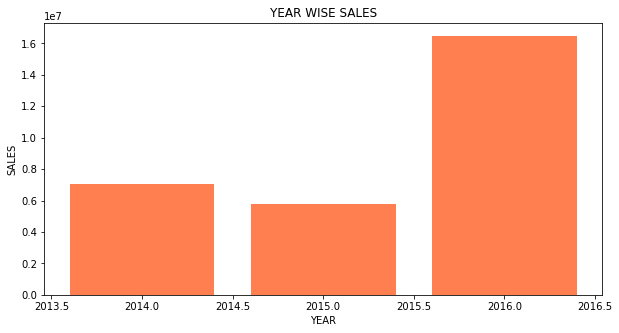

In [102]:
plt.figure(figsize = (10,5))
plt.bar(year_wise_sales['order_year'],year_wise_sales['SalesAmount'],color='coral')
plt.xlabel('YEAR')
plt.ylabel('SALES')
plt.title('YEAR WISE SALES')
plt.show()

In [36]:
year_month_wise_sales=data.groupby(['order_year','order_month'])['SalesAmount'].sum().to_frame().reset_index()
year_month_wise_sales

,order_year,order_month,SalesAmount
0,2014,1,4.733882e+05
1,2014,2,5.061917e+05
2,2014,3,4.739430e+05
3,2014,4,5.133295e+05
4,2014,5,5.439934e+05
5,2014,6,7.555279e+05
6,2014,7,5.967466e+05
7,2014,8,5.508167e+05
8,2014,9,6.441352e+05
9,2014,10,6.636923e+05


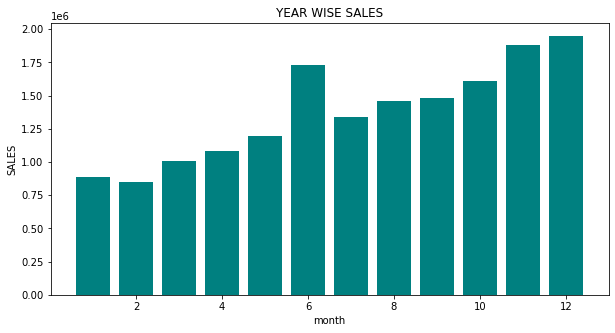

In [103]:
plt.figure(figsize = (10,5))
plt.bar(year_month_wise_sales['order_month'],year_month_wise_sales['SalesAmount'],color='teal')
plt.xlabel('month')
plt.ylabel('SALES')
plt.title('YEAR WISE SALES')
plt.show()

In [48]:
data.groupby(['country','order_year'])['SalesAmount'].sum().unstack().reset_index()

order_year,country,2014,2015,2016
0,Australia,2.568701e+06,2.099585e+06,4383479.54
1,Canada,5.731010e+05,3.050107e+05,1088879.50
2,France,4.142453e+05,6.333997e+05,1592880.75
3,Germany,5.133532e+05,5.932472e+05,1784107.09
4,United Kingdom,5.505073e+05,6.965950e+05,2140388.50
5,United States,2.452176e+06,1.434296e+06,5483882.67


In [55]:
data['Gender'].value_counts()


M    29314
F    28875
Name: Gender, dtype: int64

In [58]:
male=data[data['Gender']=='M']
female = data[data['Gender']=='F']

In [64]:
male_pro=male.groupby(['ProductName'])['OrderQuantity'].sum().nlargest(5).to_frame().reset_index()
male_pro

,ProductName,OrderQuantity
0,Water Bottle - 30 oz.,3169
1,Patch Kit/8 Patches,2475
2,Mountain Tire Tube,2301
3,Road Tire Tube,1853
4,"Sport-100 Helmet, Red",1712


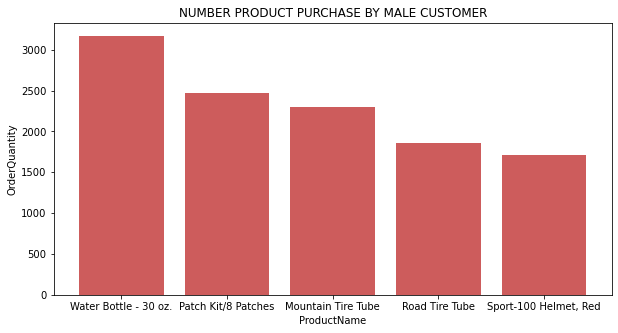

In [66]:
plt.figure(figsize = (10,5))
plt.bar(male_pro['ProductName'],male_pro['OrderQuantity'],color='indianred')
plt.xlabel('ProductName')
plt.ylabel('OrderQuantity')
plt.title('NUMBER PRODUCT PURCHASE BY MALE CUSTOMER')
plt.show()

In [68]:
female_pro=female.groupby(['ProductName'])['OrderQuantity'].sum().nlargest(5).to_frame().reset_index()
female_pro

,ProductName,OrderQuantity
0,Water Bottle - 30 oz.,3201
1,Mountain Tire Tube,2250
2,Patch Kit/8 Patches,2230
3,Road Tire Tube,1691
4,"Sport-100 Helmet, Red",1686


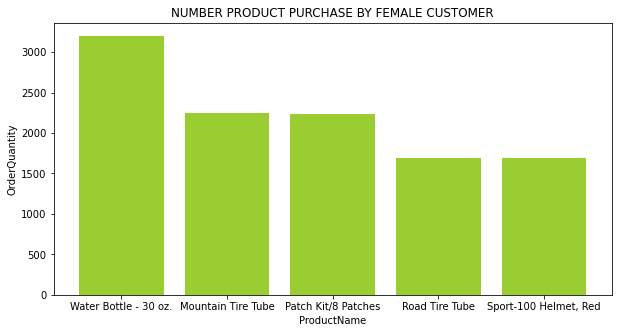

In [104]:
plt.figure(figsize = (10,5))
plt.bar(female_pro['ProductName'],female_pro['OrderQuantity'],color='yellowgreen')
plt.xlabel('ProductName')
plt.ylabel('OrderQuantity')
plt.title('NUMBER PRODUCT PURCHASE BY FEMALE CUSTOMER')
plt.show()

In [70]:
age_bins=[0,40,50,60,70,80,100]
groupnames= ["0-40","40-50", "50-60", "60-70", "70-80", "80-100"]

In [73]:
data["age category"]=pd.cut(data.CUSTOME_BIRTHDAY, age_bins, right= False, labels= groupnames)

In [76]:
data["age category"].value_counts().to_frame().reset_index()

,index,age category
0,50-60,20288
1,60-70,16473
2,70-80,9128
3,40-50,8202
4,80-100,4021
5,0-40,0


In [77]:
data.head()

,ORDER_DATE,SHIPED_DATE,CUSTOME_BIRTHDAY,NAME_CUSTMOER,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,MaritalStatus,Gender,Education,Occupation,DATE_FIRST_PURCHASE,ProductName,country,order_year,order_month,order_day,age category
0,2014-01-22,2014-01-29,57,Jon Yang,2,1699.995,1912.1544,3399.99,271.9992,M,M,Bachelors,Professional,2014-01-22,"Mountain-100 Silver, 38",Australia,2014,1,22,50-60
1,2016-01-22,2016-01-29,57,Jon Yang,1,2319.990,1265.6195,2319.99,185.5992,M,M,Bachelors,Professional,2014-01-22,"Mountain-200 Silver, 38",Australia,2016,1,22,50-60
2,2016-01-22,2016-01-29,57,Jon Yang,1,21.980,8.2205,21.98,1.7584,M,M,Bachelors,Professional,2014-01-22,Fender Set - Mountain,Australia,2016,1,22,50-60
3,2016-05-04,2016-05-11,57,Jon Yang,1,2384.070,1481.9379,2384.07,190.7256,M,M,Bachelors,Professional,2014-01-22,"Touring-1000 Blue, 46",Australia,2016,5,4,50-60
4,2016-05-04,2016-05-11,57,Jon Yang,1,28.990,10.8423,28.99,2.3192,M,M,Bachelors,Professional,2014-01-22,Touring Tire,Australia,2016,5,4,50-60


### RFM analysis
What is RFM Analysis? RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

Recency: How recently has the customer made a transaction?

Frequency: How frequently does the customer place an order?

Monetary: How much money has the customer spent on products ?

In [79]:
#Renaming the column:
#Grouping the data by Customer Unique ID to find the latest order of each customer:
df_recency = data.groupby(by = 'NAME_CUSTMOER', as_index = False)['ORDER_DATE'].max()

df_recency.rename(columns = {"ORDER_DATE": "LastPurchaseDate"}, inplace = True)

#Removing time and extracting only date from the datetime field:
df_recency["LastPurchaseDate"] = df_recency["LastPurchaseDate"].dt.date

#Using the last order in the entire dataset as a reference point to calculate recency:
recent_date = data['ORDER_DATE'].dt.date.max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

df_recency.head()

,NAME_CUSTMOER,LastPurchaseDate,Recency
0,Aaron Adams,2016-04-30,244
1,Aaron Alexander,2016-12-15,15
2,Aaron Allen,2014-12-04,757
3,Aaron Baker,2016-09-12,109
4,Aaron Bryant,2016-07-27,156


In [87]:
## calculating the frequency
frequency_df = data.groupby(['NAME_CUSTMOER']).agg({'SalesOrderNumber':'nunique'}).reset_index()
## renaming the columns 
frequency_df.rename(columns={'SalesOrderNumber':'frequency'},inplace=True)

frequency_df.head()

,NAME_CUSTMOER,frequency
0,Aaron Adams,1
1,Aaron Alexander,1
2,Aaron Allen,1
3,Aaron Baker,1
4,Aaron Bryant,2


In [88]:
## calculating Monetary
monetary_df=data.groupby(by='NAME_CUSTMOER',as_index=False)['SalesAmount'].sum()
# renaming the column
monetary_df.rename(columns={'SalesAmount':'monetary'},inplace=True)

monetary_df.head()

,NAME_CUSTMOER,monetary
0,Aaron Adams,117.96
1,Aaron Alexander,69.99
2,Aaron Allen,3399.99
3,Aaron Baker,1750.98
4,Aaron Bryant,133.96


In [89]:
rfm = df_recency.merge(frequency_df,on='NAME_CUSTMOER').merge(monetary_df,on='NAME_CUSTMOER')

rfm.drop('LastPurchaseDate',axis=1,inplace=True)

rfm.head()

,NAME_CUSTMOER,Recency,frequency,monetary
0,Aaron Adams,244,1,117.96
1,Aaron Alexander,15,1,69.99
2,Aaron Allen,757,1,3399.99
3,Aaron Baker,109,1,1750.98
4,Aaron Bryant,156,2,133.96


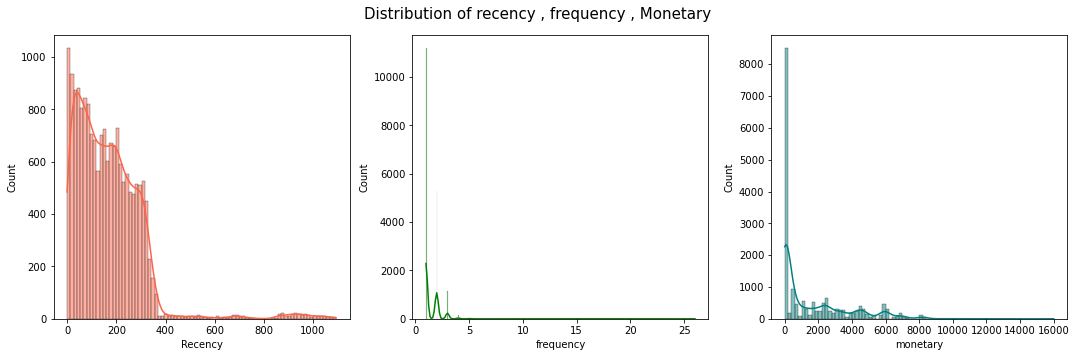

In [112]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
#sns.set_palette('BrBG')
sns.histplot(rfm['Recency'],kde=True,ax=ax[0],color = 'tomato')
sns.histplot(rfm['frequency'],kde=True,ax=ax[1],color='green')
sns.histplot(rfm['monetary'],kde=True,ax=ax[2],color='teal')

plt.suptitle('Distribution of recency , frequency , Monetary',fontsize=15)
plt.tight_layout(pad=1)
plt.show()

In [91]:
rfm_transformed = rfm.copy()
for feature in rfm.columns[2:]:
    rfm_transformed[feature]=rfm_transformed[feature].apply(lambda X:np.power(X,(1/10)))

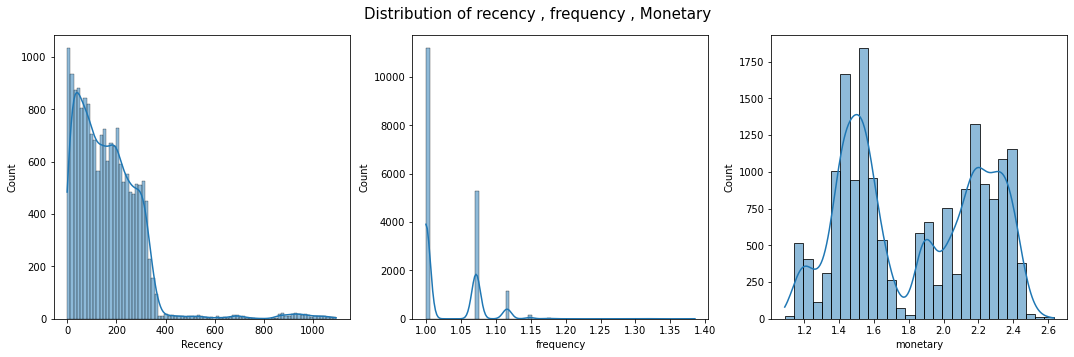

In [92]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.histplot(rfm_transformed['Recency'],kde=True,ax=ax[0])
sns.histplot(rfm_transformed['frequency'],kde=True,ax=ax[1])
sns.histplot(rfm_transformed['monetary'],kde=True,ax=ax[2])

plt.suptitle('Distribution of recency , frequency , Monetary',fontsize=15)
plt.tight_layout(pad=1)
plt.show()

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(rfm.drop('NAME_CUSTMOER', axis = 1))

scaled_rfm_df = pd.DataFrame(scaled_rfm, columns = rfm.columns[1:])

In [95]:
from sklearn.cluster import KMeans

final_model = KMeans(n_clusters = 5, random_state = 10)
final_model.fit(scaled_rfm_df)

KMeans(n_clusters=5, random_state=10)

In [96]:
data_output = rfm.copy()
data_output['Cluster'] = final_model.labels_
data_output.sample(5)

,NAME_CUSTMOER,Recency,frequency,monetary,Cluster
12279,Marshall Xu,180,2,564.9800,0
12015,Marcus Thomas,311,1,38.9800,3
1842,Bailey Adams,240,2,4558.5225,4
17144,Tyler Jackson,216,1,1735.9800,3
3566,Chloe Gonzalez,169,2,3310.4075,4


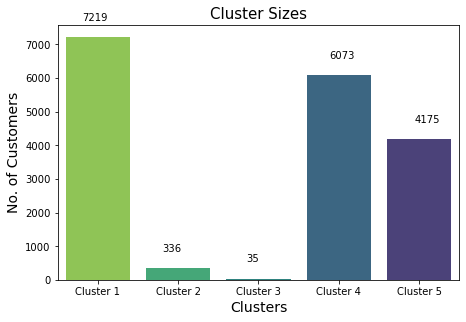

In [97]:
sns.countplot(data = data_output, x = 'Cluster', palette = 'viridis_r')
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 14)
plt.ylabel('No. of Customers', fontsize = 14)
plt.xticks([0, 1, 2, 3, 4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], rotation = 0)
plt.text(x = 0 - 0.2, y = data_output.Cluster.value_counts()[0] + 500, s = data_output.Cluster.value_counts()[0])
plt.text(x = 1 - 0.2, y = data_output.Cluster.value_counts()[1] + 500, s = data_output.Cluster.value_counts()[1])
plt.text(x = 2 - 0.15, y = data_output.Cluster.value_counts()[2] + 500, s = data_output.Cluster.value_counts()[2])
plt.text(x = 3 - 0.12, y = data_output.Cluster.value_counts()[3] + 500, s = data_output.Cluster.value_counts()[3])
plt.text(x = 4 - 0.05, y = data_output.Cluster.value_counts()[4] + 500, s = data_output.Cluster.value_counts()[4])
plt.tight_layout(pad = -1)
plt.show()

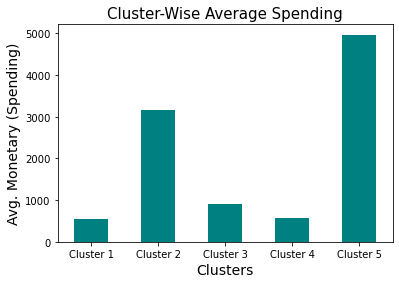

In [98]:
monetary_averages = pd.Series(data_output.groupby(by = 'Cluster')['monetary'].mean())
monetary_averages.plot(kind = 'bar', color = 'teal')
plt.title('Cluster-Wise Average Spending', fontsize = 15)
plt.xlabel('Clusters', fontsize = 14)
plt.ylabel('Avg. Monetary (Spending)', fontsize = 14)
plt.xticks([0, 1, 2, 3, 4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], rotation = 0)

plt.show()

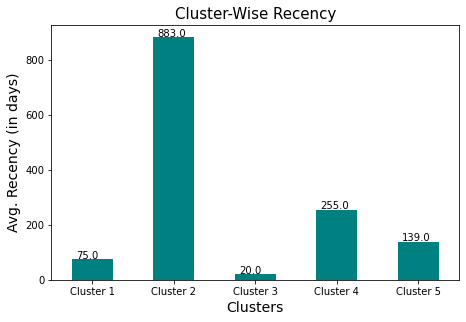

In [99]:
recency_averages = pd.Series(data_output.groupby(by = 'Cluster')['Recency'].mean())
recency_averages.plot(kind = 'bar', color = 'teal')
plt.title('Cluster-Wise Recency', fontsize = 15)
plt.xlabel('Clusters', fontsize = 14)
plt.ylabel('Avg. Recency (in days)', fontsize = 14)
plt.xticks([0, 1, 2, 3, 4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], rotation = 0)
plt.text(x = 0 - 0.2, y = recency_averages[0] + 3, s = "{}".format(recency_averages[0].round(0)))
plt.text(x = 1 - 0.2, y = recency_averages[1] + 3, s = "{}".format(recency_averages[1].round(0)))
plt.text(x = 2 - 0.2, y = recency_averages[2] + 3, s = "{}".format(recency_averages[2].round(0)))
plt.text(x = 3 - 0.2, y = recency_averages[3] + 3, s = "{}".format(recency_averages[3].round(0)))
plt.text(x = 4 - 0.2, y = recency_averages[4] + 3, s = "{}".format(recency_averages[4].round(0)))
plt.tight_layout(pad = -1)
plt.show()

In [100]:
rfm_agg = data_output.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'frequency': 'mean', 
    'monetary': 'mean',
    'Cluster': 'count'
}).round(1)

rfm_agg.rename(columns = {"Recency": "Avg. Recency",
                          "frequency": "Avg. Frequency",
                          "monetary": "Avg. Monetary",
                          "Cluster": "Customer Count"
                         }, inplace = True)

rfm_agg

,Avg. Recency,Avg. Frequency,Avg. Monetary,Customer Count
Cluster,,,,
0,75.1,1.3,554.3,7219
1,883.3,1.0,3151.0,336
2,19.6,19.1,898.5,35
3,255.1,1.1,573.9,6073
4,139.2,2.3,4965.6,4175
